# Prosper Loan Data Exploration
## by Chukwume Ijeh

## Preliminary Wrangling

> This document explores a dataset originally containing 113,937 loan entries with 81 variables on each entry, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
df_loan.shape

(113937, 81)

In [4]:
# high-level overview of data composition
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Subset the dataframe by selecting features of interest
cols = ['ListingCreationDate','ProsperScore', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'CurrentDelinquencies']
df_sub = df_loan[cols]

In [6]:
df_sub.dtypes

ListingCreationDate       object
ProsperScore             float64
IsBorrowerHomeowner         bool
CreditScoreRangeLower    float64
LoanOriginalAmount         int64
BorrowerAPR              float64
StatedMonthlyIncome      float64
DebtToIncomeRatio        float64
Term                       int64
ProsperRating (Alpha)     object
EmploymentStatus          object
CurrentDelinquencies     float64
dtype: object

In [7]:
# Convert listing creation date to datetime
df_sub['ListingCreationDate'] = pd.to_datetime(df_sub['ListingCreationDate'])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Select loan entries that occurred after July, 2009
df_sub = df_sub[df_sub['ListingCreationDate'] >= '2009-08-1']

In [9]:
# Remove loans with missing borrower APR information
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

In [10]:
df_sub.head()

,ListingCreationDate,ProsperScore,IsBorrowerHomeowner,CreditScoreRangeLower,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,Term,ProsperRating (Alpha),EmploymentStatus,CurrentDelinquencies
1,2014-02-27 08:28:07.900,7.0,False,680.0,10000,0.12016,6125.000000,0.18,36,A,Employed,0.0
3,2012-10-22 11:02:35.010,9.0,True,800.0,10000,0.12528,2875.000000,0.15,36,A,Employed,4.0
4,2013-09-14 18:38:39.097,4.0,True,680.0,15000,0.24614,9583.333333,0.26,36,D,Employed,0.0
5,2013-12-14 08:26:37.093,10.0,True,740.0,15000,0.15425,8333.333333,0.36,60,B,Employed,0.0
6,2013-04-12 09:52:56.147,2.0,False,680.0,3000,0.31032,2083.333333,0.27,36,E,Employed,0.0


In [11]:
# descriptive statistics for numeric variables
df_sub.describe()

,ProsperScore,CreditScoreRangeLower,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,Term,CurrentDelinquencies
count,84672.000000,84672.000000,84672.000000,84672.000000,8.467200e+04,77391.000000,84672.000000,84672.000000
mean,5.945165,699.375945,9094.024341,0.226738,5.933452e+03,0.258813,42.500000,0.322397
std,2.375376,47.070306,6288.611188,0.079889,8.247730e+03,0.318611,11.648913,1.110787
min,1.000000,600.000000,1000.000000,0.049350,0.000000e+00,0.000000,12.000000,0.000000
25%,4.000000,660.000000,4000.000000,0.163610,3.441667e+03,0.150000,36.000000,0.000000
50%,6.000000,700.000000,7500.000000,0.219450,5.000000e+03,0.220000,36.000000,0.000000
75%,8.000000,720.000000,13750.000000,0.292540,7.083333e+03,0.320000,60.000000,0.000000
max,11.000000,880.000000,35000.000000,0.423950,1.750003e+06,10.010000,60.000000,51.000000


In [12]:
df_sub.shape

(84672, 12)

#### What is the structure of your dataset?

> The new dataset contains 84,672 loan entries with 12 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others).

### What is/are the main feature(s) of interest in your dataset?

> This project is most interested in figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the following features: Borrowers stated monthly income, loan term, total loan amount, prosper rating, prosper score, employment status and others will help support investigation into borrower's APR.

## Univariate Exploration

> Let's start by converting all column names to lower case and then look at the distribution of the main variable of interest: borrower APR.

In [13]:
df_sub.columns = map(str.lower, df_sub.columns)

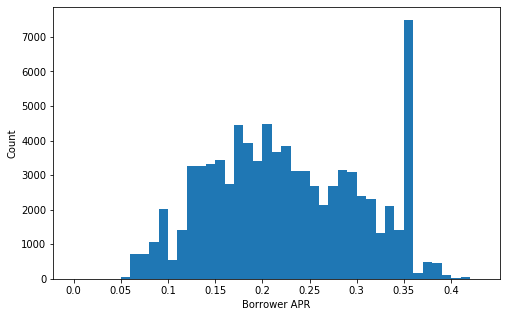

In [14]:
bins = np.arange(0, df_sub.borrowerapr.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sub, x = 'borrowerapr', bins = bins)
ticks = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
plt.xticks(ticks, ticks)
plt.xlabel('Borrower APR')
plt.ylabel('Count');

> There is also a very distinct peak between 0.35 and 0.36. 

In [15]:
# Check loans with APR between 0.35 and 0.36
df_sub[(df_sub['borrowerapr'] >= 0.35) & (df_sub['borrowerapr'] <= 0.36)]

,listingcreationdate,prosperscore,isborrowerhomeowner,creditscorerangelower,loanoriginalamount,borrowerapr,statedmonthlyincome,debttoincomeratio,term,prosperrating (alpha),employmentstatus,currentdelinquencies
15,2012-04-10 09:14:46.297,5.0,True,700.0,4000,0.35797,5500.000000,0.49,36,HR,Other,0.0
22,2013-01-30 09:36:13.783,2.0,False,700.0,4000,0.35356,118.333333,9.20,36,HR,Other,0.0
31,2012-09-21 13:37:43.210,5.0,False,680.0,2000,0.35797,2250.000000,0.04,36,HR,Other,0.0
67,2011-03-25 17:20:01.857,3.0,False,600.0,3000,0.35843,4777.000000,0.28,12,E,Employed,0.0
71,2012-10-23 13:43:45.530,4.0,True,760.0,2774,0.35797,2916.666667,0.53,36,HR,Employed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113875,2011-11-16 09:19:53.293,4.0,True,720.0,5000,0.35132,4702.166667,0.19,36,E,Employed,6.0
113905,2011-11-15 15:32:05.890,2.0,True,740.0,4000,0.35797,3250.000000,0.35,36,HR,Employed,0.0
113907,2013-11-09 06:55:05.690,2.0,False,640.0,4000,0.35356,2166.666667,0.40,36,HR,Employed,1.0
113908,2010-11-29 10:40:09.730,5.0,False,700.0,7500,0.35858,2833.333333,NaN,36,E,Employed,0.0


> From the above table, there appears to be a total of 7000 loan entries that fall within this range with varying features.

> Next up, look at the distribution of a predictor variable of interest: loan original amount

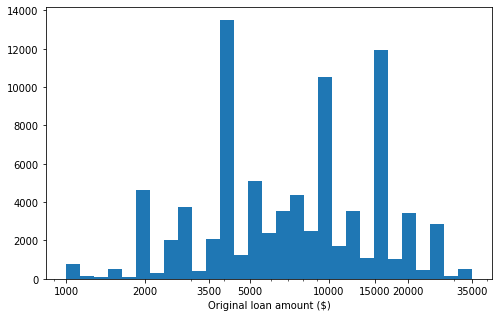

In [16]:
MIN = df_sub['loanoriginalamount'].min()
MAX = df_sub['loanoriginalamount'].max()

bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 30)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sub, x = 'loanoriginalamount', bins=bins)
plt.xscale('log')
ticks = [1000, 2000, 3500, 5000, 10000, 15000, 20000, 35000]
plt.xticks(ticks, ticks)
plt.xlabel('Original loan amount ($)');

> The distribution of original loan amount looks multimodal. The most frequent loans fall somewhat between the ranges of \\$1900 - \\$2000, \\$3500 - \\$5000, \\$9000 - \\$10000, \\$15000 - \\$16000.

> Next up: stated monthly income

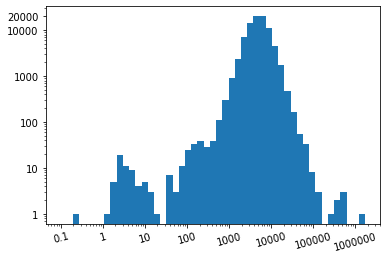

In [65]:
# Distribution of stated monthly income
# A value is added to MIN because due to error caused by dividing by 0
MIN = df_sub['statedmonthlyincome'].min() + 0.1
MAX = df_sub['statedmonthlyincome'].max()

bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50)
plt.hist(data = df_sub, x = 'statedmonthlyincome', bins=bins)
plt.xscale('log')
plt.yscale('log')
xticks= [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
yticks = [1, 10, 100, 1000, 10000, 20000]
plt.xticks(xticks, xticks, rotation=15)
plt.yticks(yticks, yticks);

> Before applying the log transformation to the x axis, the distribution was severely right skewed 

> There appears to be a wide disparity in the stated monthly income of loan entries. While some are earning \\$0, others are earning are earning over \\$1,000,000 every month. 

> Does the stated monthly income greatly impact the borrower's APR?

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!